In [16]:
import pandas as pd
import sklearn
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import re

### Load the Data

In [26]:
BBC = pd.read_excel('./tv_commercial_datasets/BBC_Cleaned.xlsx')
CNN = pd.read_excel('./tv_commercial_datasets/CNN_Cleaned.xlsx')
CNNIBN = pd.read_excel('./tv_commercial_datasets/CNNIBN_Cleaned.xlsx')
NDTV = pd.read_excel('./tv_commercial_datasets/NDTV_Cleaned.xlsx')
TIMESNOW = pd.read_excel('./tv_commercial_datasets/TIMESNOW_Cleaned.xlsx')

In [3]:
# tvcommercials_path = 'D:/KULIAHHH/semester 7/DATA MINING/PROYEK/Program/dataset'
# filename=['BBC','NDTV','CNNIBN','TIMESNOW','CNN']
# df_name = []
# def read_files(path):
#     for file in filename:
#         df_name.append(pd.read_table(path+'/'+file+'.txt', header=None))
#     return df_name

### Exploratory Data Analysis

### data dimensionality, feature names, and feature types

In [4]:
nRow, nCol = BBC.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 17720 rows and 205 columns


In [5]:
print(BBC.columns)

Index([      1,       2,       3,       4,       5,       6,       7,       8,
             9,      10,
       ...
           882,     924,     959,    1002,    1016,    1048,    1112,    4124,
          4125, 'Label'],
      dtype='object', length=205)


In [6]:
BBC.describe()

,1,2,3,4,5,6,7,8,9,10,...,882,924,959,1002,1016,1048,1112,4124,4125,Label
count,17720.000000,1.772000e+04,1.772000e+04,1.772000e+04,1.772000e+04,17720.000000,17720.000000,17720.000000,17720.000000,1.772000e+04,...,77.000000,7173.000000,8030.000000,5669.000000,3963.000000,6928.000000,2223.000000,1.772000e+04,1.772000e+04,17720.000000
mean,129.677314,1.953233e+06,1.034594e+06,7.812792e+06,5.036214e+06,0.012449,0.008640,0.081718,0.045347,2.775965e+09,...,0.013688,0.041159,0.043796,0.028143,0.029381,0.029255,0.005727,5.384772e+02,4.420019e+02,-0.050113
std,335.345837,2.561666e+06,1.535140e+06,8.465479e+06,6.360485e+06,0.007974,0.005428,0.053079,0.029508,1.532739e+09,...,0.027980,0.042365,0.049731,0.042630,0.047601,0.036992,0.013392,5.341550e+04,5.877140e+04,0.998772
min,25.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000087,0.000022,0.000059,0.000059,0.000110,0.000007,0.000116,1.125257e-04,1.398629e-04,-1.000000
25%,34.000000,1.293390e-01,8.655950e-02,1.456958e+06,4.730470e-01,0.006070,0.005005,0.050425,0.030973,3.125285e+09,...,0.001289,0.012931,0.013587,0.005335,0.004687,0.008929,0.001276,2.489567e-01,2.511786e-01,-1.000000
50%,62.000000,1.184123e+06,7.455125e-01,5.136750e+06,2.947678e+06,0.014721,0.010197,0.092202,0.050496,3.542536e+09,...,0.003713,0.027273,0.027315,0.013393,0.012597,0.018172,0.002551,4.992477e-01,4.967223e-01,-1.000000
75%,124.000000,3.056430e+06,1.802254e+06,1.146167e+07,7.514332e+06,0.017754,0.013043,0.117555,0.064040,3.761637e+09,...,0.010714,0.054167,0.053752,0.034091,0.034884,0.035714,0.005435,7.521003e-01,7.461091e-01,1.000000
max,33871.000000,2.167922e+07,2.875662e+07,6.728574e+07,6.339658e+07,0.035301,0.021416,0.394551,0.228486,3.977793e+09,...,0.154762,0.437500,0.550000,0.637500,0.862500,0.840909,0.223214,6.366897e+06,7.823443e+06,1.000000


In [7]:
BBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 0 to 17719
Columns: 205 entries, 1 to Label
dtypes: float64(203), int64(2)
memory usage: 27.7 MB


203 features bertipe data float64 dan 2 feature bertipe data int64 yaitu Label

### Missing and Duplicates Value

In [8]:
BBC.info

<bound method DataFrame.info of          1             2             3           4             5         6  \
0      123  1.316440e+06  1.516003e+06   5605905.0  5.346760e+06  0.013233   
1      124  9.660790e-01  5.464200e-01   4046537.0  3.190973e+06  0.008338   
2      109  2.035407e+06  5.716430e-01   9551406.0  5.803685e+06  0.015189   
3       86  3.206008e+06  7.863260e-01  10092709.0  2.693058e+06  0.013962   
4       76  3.135861e+06  8.963460e-01  10348035.0  2.651010e+06  0.020914   
...    ...           ...           ...         ...           ...       ...   
17715   66  2.685833e+06  3.018033e+06  13668181.0  1.718740e+07  0.014353   
17716   33  1.597726e+06  1.008243e+06   5417785.0  2.954453e+06  0.015893   
17717   25  1.465399e+06  7.022400e-01   5848524.0  3.574110e+06  0.019303   
17718   88  6.687130e-01  1.235713e+06   4243607.0  1.077148e+07  0.018320   
17719   47  2.183050e-01  1.974950e-01   1000669.0  8.485860e-01  0.019544   

              7         8      

In [27]:
duplicate = BBC.duplicated()
print(duplicate.sum())
BBC[duplicate]

# df.drop_duplicates
# return df.to_dict(orient="records")

0


,1,2,3,4,5,6,7,8,9,10,...,882,924,959,1002,1016,1048,1112,4124,4125,Label


In [28]:
duplicate = CNN.duplicated()
print(duplicate.sum())
CNN[duplicate]


0


,1,2,3,4,5,6,7,8,9,10,...,924,959,1002,1016,1028,1048,1112,4124,4125,Label


In [30]:
duplicate = NDTV.duplicated()
print(duplicate.sum())
NDTV[duplicate]

# df.drop_duplicates
# return df.to_dict(orient="records")

0


,1,2,3,4,5,6,7,8,9,10,...,882,924,959,1002,1016,1048,1112,4124,4125,Label


In [31]:
duplicate = TIMESNOW.duplicated()
print(duplicate.sum())
TIMESNOW[duplicate]

# df.drop_duplicates
# return df.to_dict(orient="records")

0


,1,2,3,4,5,6,7,8,9,10,...,877,882,924,959,1002,1016,1048,4124,4125,Label


In [32]:
duplicate = CNNIBN.duplicated()
print(duplicate.sum())
CNNIBN[duplicate]

# df.drop_duplicates
# return df.to_dict(orient="records")

0


,1,2,3,4,5,6,7,8,9,10,...,924,959,1002,1016,1028,1048,1112,4124,4125,Label


### Correlation

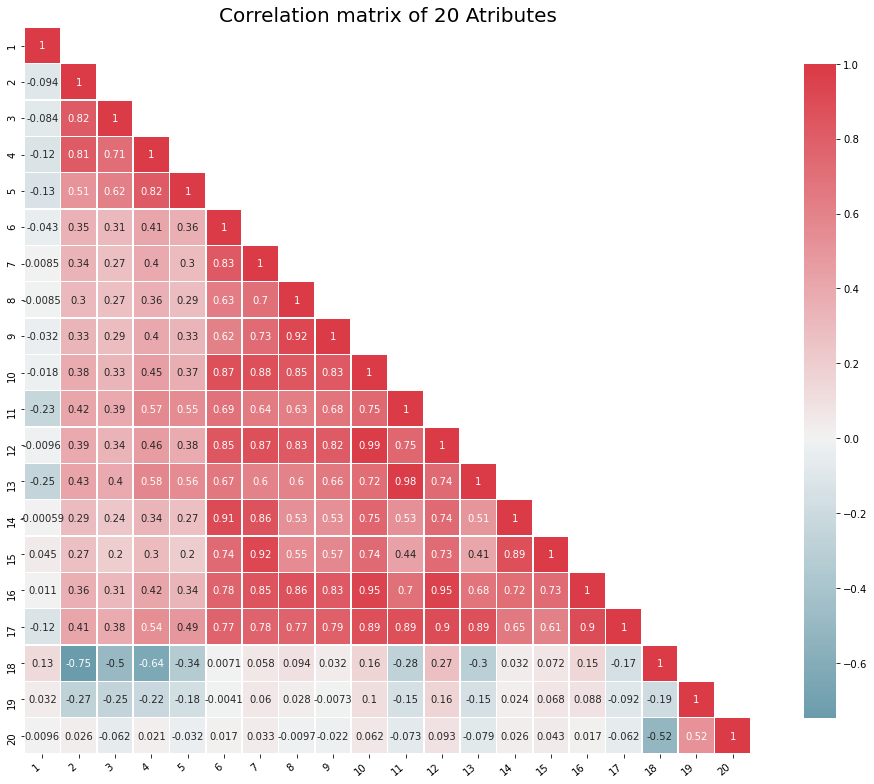

In [40]:
corr = BBC.iloc[:,:20].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Correlation matrix of 20 Atributes', fontsize=20)
plt.tight_layout()

In [38]:
correlations

,1,2,3,4,5,6,7,8,9,10,...,882,924,959,1002,1016,1048,1112,4124,4125,Label
1,1.000000,-0.083433,-0.129784,-0.074162,-0.292014,0.074162,0.292014,-0.148325,-0.171500,0.838962,...,NaN,0.181834,0.355786,-0.409261,-0.300019,-0.191725,-0.333333,0.064892,0.101973,NaN
2,-0.083433,1.000000,0.567816,0.590805,0.075862,0.158621,-0.062069,0.200000,0.117241,-0.006897,...,NaN,-0.153846,-0.257143,0.176471,0.076923,0.073593,-0.200000,0.039080,-0.227586,NaN
3,-0.129784,0.567816,1.000000,0.452874,0.287356,0.066667,-0.108046,0.273563,0.163218,-0.025287,...,NaN,-0.307692,-0.447619,0.241830,0.230769,0.186147,0.066667,0.011494,-0.098851,NaN
4,-0.074162,0.590805,0.452874,1.000000,0.291954,0.006897,-0.020690,0.296552,0.186207,0.006897,...,NaN,0.000000,-0.238095,0.071895,0.054945,0.298701,-0.066667,0.080460,-0.213793,NaN
5,-0.292014,0.075862,0.287356,0.291954,1.000000,-0.186207,-0.167816,0.278161,0.268966,-0.204598,...,NaN,-0.230769,-0.409524,0.176471,0.384615,0.255411,0.733333,0.080460,-0.066667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,-0.191725,0.073593,0.186147,0.298701,0.255411,-0.021645,0.177489,0.411255,0.281385,-0.082251,...,NaN,-0.303030,-0.472527,0.276190,0.121212,1.000000,0.200000,-0.125541,0.082251,NaN
1112,-0.333333,-0.200000,0.066667,-0.066667,0.733333,-0.200000,-0.200000,0.466667,0.466667,-0.200000,...,NaN,-1.000000,-1.000000,0.666667,-1.000000,0.200000,1.000000,-0.466667,-0.333333,NaN
4124,0.064892,0.039080,0.011494,0.080460,0.080460,0.025287,-0.167816,-0.108046,-0.117241,0.080460,...,NaN,0.205128,-0.028571,-0.163399,-0.010989,-0.125541,-0.466667,1.000000,-0.048276,NaN
4125,0.101973,-0.227586,-0.098851,-0.213793,-0.066667,0.043678,0.218391,0.112644,0.085057,0.071264,...,NaN,-0.128205,0.047619,-0.163399,0.142857,0.082251,-0.333333,-0.048276,1.000000,NaN


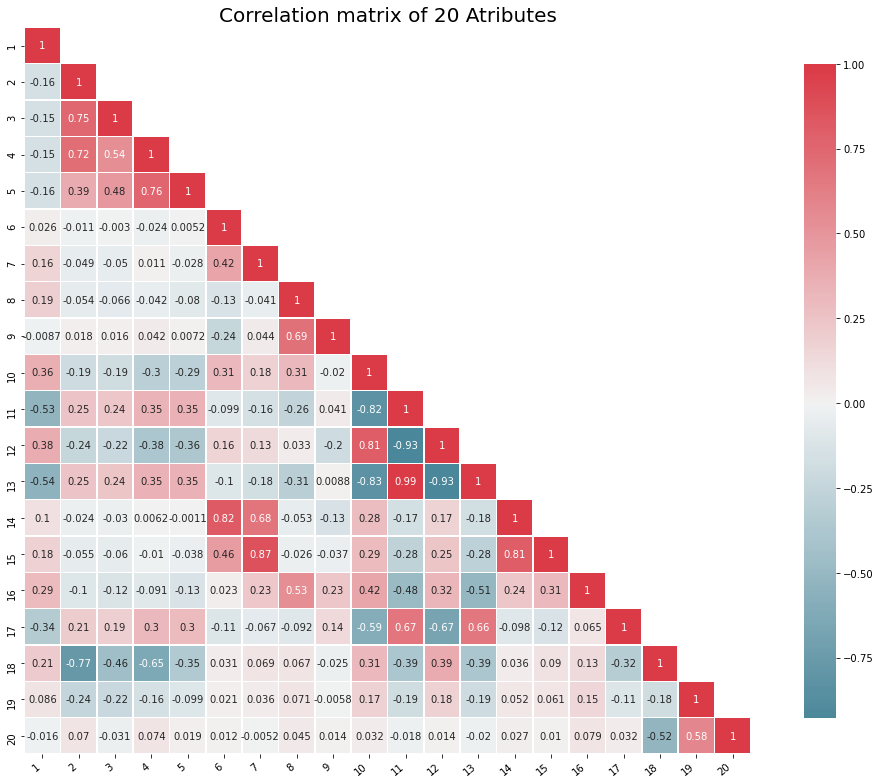

In [41]:
corr = CNN.iloc[:,:20].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Correlation matrix of 20 Atributes', fontsize=20)
plt.tight_layout()

In [43]:
correlations

,1,2,3,4,5,6,7,8,9,10,...,882,924,959,1002,1016,1048,1112,4124,4125,Label
1,1.000000,-0.083433,-0.129784,-0.074162,-0.292014,0.074162,0.292014,-0.148325,-0.171500,0.838962,...,NaN,0.181834,0.355786,-0.409261,-0.300019,-0.191725,-0.333333,0.064892,0.101973,NaN
2,-0.083433,1.000000,0.567816,0.590805,0.075862,0.158621,-0.062069,0.200000,0.117241,-0.006897,...,NaN,-0.153846,-0.257143,0.176471,0.076923,0.073593,-0.200000,0.039080,-0.227586,NaN
3,-0.129784,0.567816,1.000000,0.452874,0.287356,0.066667,-0.108046,0.273563,0.163218,-0.025287,...,NaN,-0.307692,-0.447619,0.241830,0.230769,0.186147,0.066667,0.011494,-0.098851,NaN
4,-0.074162,0.590805,0.452874,1.000000,0.291954,0.006897,-0.020690,0.296552,0.186207,0.006897,...,NaN,0.000000,-0.238095,0.071895,0.054945,0.298701,-0.066667,0.080460,-0.213793,NaN
5,-0.292014,0.075862,0.287356,0.291954,1.000000,-0.186207,-0.167816,0.278161,0.268966,-0.204598,...,NaN,-0.230769,-0.409524,0.176471,0.384615,0.255411,0.733333,0.080460,-0.066667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,-0.191725,0.073593,0.186147,0.298701,0.255411,-0.021645,0.177489,0.411255,0.281385,-0.082251,...,NaN,-0.303030,-0.472527,0.276190,0.121212,1.000000,0.200000,-0.125541,0.082251,NaN
1112,-0.333333,-0.200000,0.066667,-0.066667,0.733333,-0.200000,-0.200000,0.466667,0.466667,-0.200000,...,NaN,-1.000000,-1.000000,0.666667,-1.000000,0.200000,1.000000,-0.466667,-0.333333,NaN
4124,0.064892,0.039080,0.011494,0.080460,0.080460,0.025287,-0.167816,-0.108046,-0.117241,0.080460,...,NaN,0.205128,-0.028571,-0.163399,-0.010989,-0.125541,-0.466667,1.000000,-0.048276,NaN
4125,0.101973,-0.227586,-0.098851,-0.213793,-0.066667,0.043678,0.218391,0.112644,0.085057,0.071264,...,NaN,-0.128205,0.047619,-0.163399,0.142857,0.082251,-0.333333,-0.048276,1.000000,NaN


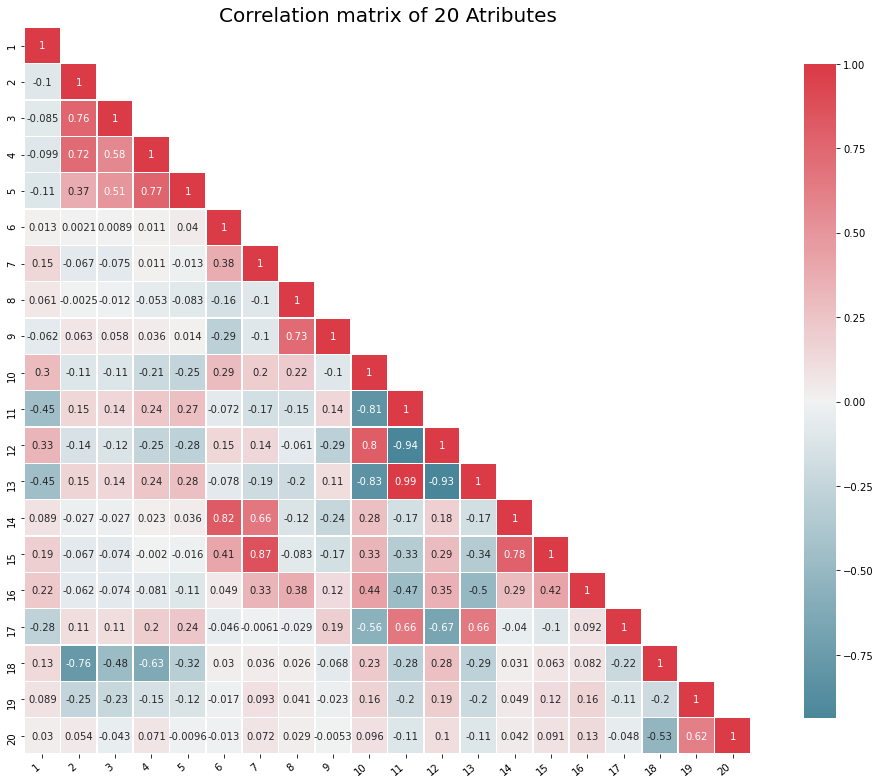

In [44]:
corr = NDTV.iloc[:,:20].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Correlation matrix of 20 Atributes', fontsize=20)
plt.tight_layout()

In [45]:
correlations

,1,2,3,4,5,6,7,8,9,10,...,882,924,959,1002,1016,1048,1112,4124,4125,Label
1,1.000000,-0.083433,-0.129784,-0.074162,-0.292014,0.074162,0.292014,-0.148325,-0.171500,0.838962,...,NaN,0.181834,0.355786,-0.409261,-0.300019,-0.191725,-0.333333,0.064892,0.101973,NaN
2,-0.083433,1.000000,0.567816,0.590805,0.075862,0.158621,-0.062069,0.200000,0.117241,-0.006897,...,NaN,-0.153846,-0.257143,0.176471,0.076923,0.073593,-0.200000,0.039080,-0.227586,NaN
3,-0.129784,0.567816,1.000000,0.452874,0.287356,0.066667,-0.108046,0.273563,0.163218,-0.025287,...,NaN,-0.307692,-0.447619,0.241830,0.230769,0.186147,0.066667,0.011494,-0.098851,NaN
4,-0.074162,0.590805,0.452874,1.000000,0.291954,0.006897,-0.020690,0.296552,0.186207,0.006897,...,NaN,0.000000,-0.238095,0.071895,0.054945,0.298701,-0.066667,0.080460,-0.213793,NaN
5,-0.292014,0.075862,0.287356,0.291954,1.000000,-0.186207,-0.167816,0.278161,0.268966,-0.204598,...,NaN,-0.230769,-0.409524,0.176471,0.384615,0.255411,0.733333,0.080460,-0.066667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,-0.191725,0.073593,0.186147,0.298701,0.255411,-0.021645,0.177489,0.411255,0.281385,-0.082251,...,NaN,-0.303030,-0.472527,0.276190,0.121212,1.000000,0.200000,-0.125541,0.082251,NaN
1112,-0.333333,-0.200000,0.066667,-0.066667,0.733333,-0.200000,-0.200000,0.466667,0.466667,-0.200000,...,NaN,-1.000000,-1.000000,0.666667,-1.000000,0.200000,1.000000,-0.466667,-0.333333,NaN
4124,0.064892,0.039080,0.011494,0.080460,0.080460,0.025287,-0.167816,-0.108046,-0.117241,0.080460,...,NaN,0.205128,-0.028571,-0.163399,-0.010989,-0.125541,-0.466667,1.000000,-0.048276,NaN
4125,0.101973,-0.227586,-0.098851,-0.213793,-0.066667,0.043678,0.218391,0.112644,0.085057,0.071264,...,NaN,-0.128205,0.047619,-0.163399,0.142857,0.082251,-0.333333,-0.048276,1.000000,NaN
